In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("../../bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)


IOError: [Errno 2] No such file or directory: '../../bin/imports.ipynb'

### Plots

MHC-I models

In [6]:
for threshold in [0, 2, 5, 10, 20, 50]:
    print "threshold: ", threshold
    for model in [0, 1, 2, 3]:
        try:
            df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.mhc_i.model_{0}.{1}.10.data.txt'.format(model, threshold), sep=' ')
            print model, metrics.roc_auc_score(df.label, df.predicted_prob)
        except:
            print "nope"

threshold:  0
0 0.57751482843
1 0.587798218273
2 0.574343310961
3 0.569843716567
threshold:  2
0 0.562387634388
1 0.58226989706
2 0.580002333551
3 0.567661444759
threshold:  5
0 0.577926501326
1 0.585770431208
2 0.592810066109
3 0.586401093251
threshold:  10
0 0.590829891971
1 0.589184016621
2 0.60408306706
3 0.59859771616
threshold:  20
0 0.602379479732
1 0.594681261179
2 0.588693036754
3 0.584002177731
threshold:  50
0 0.544483104407
1 0.532123704407
2 0.552463699451
3 0.547854126015


In [7]:
for threshold in [0, 2, 5, 10, 20, 50]:
    print "threshold: ", threshold
    for model in [0, 1, 2, 3]:
        
        try:
            df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.mhc_ii.model_{0}.{1}.10.data.txt'.format(model, threshold), sep=' ')
            print model, metrics.roc_auc_score(df.label, df.predicted_prob)
        except:
            print "nope"

threshold:  0
0 0.575755484185
1 0.58744410835
2 0.597757890832
3 0.567407870623
threshold:  2
0 0.559459538844
1 0.576414521813
2 0.608711038427
3 0.571419792249
threshold:  5
0 0.587360370907
1 0.584443138857
2 0.609749250882
3 0.61518774131
threshold:  10
0 0.541954627948
1 0.548017813847
2 0.615935811992
3 0.621434701635
threshold:  20
0 0.564791266651
1 0.566061443293
2 0.616803948094
3 0.625841249012
threshold:  50
0 0.510568641673
1 0.515878912486
2 0.595799945278
3 0.598448818037


In [2]:
for threshold in [2]:
    print "threshold: ", threshold
    for model in [0, 1, 2, 3]:
        
        try:
            df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.both_classes.model_{0}.{1}.10.data.txt'.format(model, threshold), sep=' ')
            print model, metrics.roc_auc_score(df.label, df.predicted_prob)
        except:
            print "nope"

threshold:  2
0 0.611858782892
1 0.604287971645
2 0.613295489059
3 0.604500353318


In [ ]:
# plot an ROC comparing the best

In [3]:
from sklearn.metrics import precision_recall_curve

In [7]:
def plot_ROC(threshold):
    best_models = []
    for receptor in ['mhc_i', 'mhc_ii', 'both_classes']:
        best_score, best_model = 0, 0
        for model in [0, 1, 2, 3]:
            try:
                df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.{2}.model_{0}.{1}.10.data.txt'.format(model, threshold, receptor), sep=' ')
                score = metrics.roc_auc_score(df.label, df.predicted_prob)
                if score > best_score:
                    best_score = score
                    best_model = model
            except:
                print "nope"
        best_models.append(best_model)
    modelI, modelII, modelboth = best_models
    print best_models
    df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.mhc_i.model_{0}.{1}.10.data.txt'.format(modelI, threshold), sep=' ')
    precision_I, recall_I, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
    fpr_I, tpr_I, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
    score_I = metrics.roc_auc_score(df.label, df.predicted_prob)
    df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.mhc_ii.model_{0}.{1}.10.data.txt'.format(modelII, threshold), sep=' ')
    precision_II, recall_II, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
    fpr_II, tpr_II, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
    score_II = metrics.roc_auc_score(df.label, df.predicted_prob)
    df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.both_classes.model_{0}.{1}.10.data.txt'.format(modelboth, threshold), sep=' ')
    precision_both, recall_both, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
    fpr_both, tpr_both, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
    score_both = metrics.roc_auc_score(df.label, df.predicted_prob)

    sns.set_style("white")
    plt.figure(figsize=(6,5))
    plt.plot([0,1], [0, 1], c='k', label='Random')
    plt.plot(fpr_I, tpr_I, c='b', label='MHC-I: {0}'.format(round(score_I, 2)))
    plt.plot(fpr_II, tpr_II, c='g', label='MHC-II: {0}'.format(round(score_II, 2)))
    plt.plot(fpr_both, tpr_both, c='r', label='MHC-I/MHC-II: {0}'.format(round(score_both, 2)))
    plt.title('threshold: {0}'.format(threshold))
    plt.legend(loc=4)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/predictions/ROC.best_for_{0}.pdf'.format(threshold))
    plt.show()
    plt.clf()
    

In [ ]:
for threshold in [2]:
    plot_ROC(threshold)

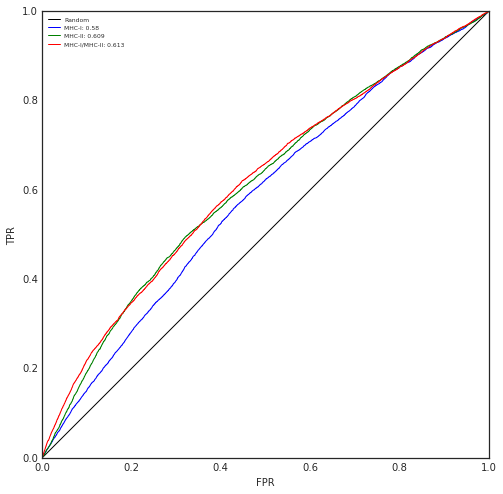

In [6]:
#modelI, modelII, modelboth = [2, 2, 0]
modelI, modelII, modelboth = [2, 2, 2]

threshold = 2
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.mhc_i.model_{0}.{1}.10.data.txt'.format(modelI, threshold), sep=' ')
precision_I, recall_I, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
fpr_I, tpr_I, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
score_I = metrics.roc_auc_score(df.label, df.predicted_prob)
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.mhc_ii.model_{0}.{1}.10.data.txt'.format(modelII, threshold), sep=' ')
precision_II, recall_II, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
fpr_II, tpr_II, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
score_II = metrics.roc_auc_score(df.label, df.predicted_prob)
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.both_classes.model_{0}.{1}.10.data.txt'.format(modelboth, threshold), sep=' ')
precision_both, recall_both, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
fpr_both, tpr_both, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
score_both = metrics.roc_auc_score(df.label, df.predicted_prob)

sns.set_style("white")
#plt.figure(figsize=(3,3))
plt.figure(figsize=(8,8))
plt.plot([0,1], [0, 1], c='k', label='Random')
plt.plot(fpr_I, tpr_I, c='b', label='MHC-I: {0}'.format(round(score_I, 3)))
plt.plot(fpr_II, tpr_II, c='g', label='MHC-II: {0}'.format(round(score_II, 3)))
plt.plot(fpr_both, tpr_both, c='r', label='MHC-I/MHC-II: {0}'.format(round(score_both, 3)))
#plt.title('threshold: {0}'.format(threshold))
plt.legend(loc=2, prop={'size': 6})
plt.xlabel('FPR')
plt.ylabel('TPR')
#plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/predictions/ROC.best_for_{0}.pdf'.format(threshold))
plt.show()
plt.clf()

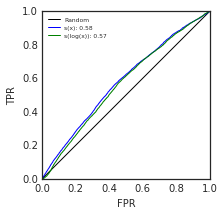

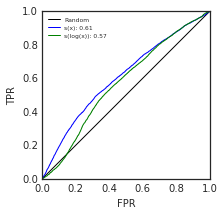

IOError: File /cellar/users/ramarty/Data/hla_ii/generated_data/predictions.both.model_2.2.10.data.txt does not exist

In [14]:
threshold = 2
for category in ['mhc_i', 'mhc_ii', 'both']:
    df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.{0}.model_2.{1}.10.data.txt'.format(category, threshold), sep=' ')
    precision_I, recall_I, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
    fpr_I, tpr_I, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
    score_I = metrics.roc_auc_score(df.label, df.predicted_prob)
    df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.{0}.model_3.{1}.10.data.txt'.format(category, threshold), sep=' ')
    precision_II, recall_II, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
    fpr_II, tpr_II, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
    score_II = metrics.roc_auc_score(df.label, df.predicted_prob)


    sns.set_style("white")
    plt.figure(figsize=(3,3))
    plt.plot([0,1], [0, 1], c='k', label='Random')
    plt.plot(fpr_I, tpr_I, c='b', label='s(x): {0}'.format(round(score_I, 2)))
    plt.plot(fpr_II, tpr_II, c='g', label='s(log(x)): {0}'.format(round(score_II, 2)))
    #plt.title('threshold: {0}'.format(threshold))
    plt.legend(loc=2, prop={'size': 6})
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/predictions/ROC.{0}.{1}.pdf'.format(category, threshold))
    plt.show()
    plt.clf()

In [7]:
modelI, modelII, modelboth = [2, 2, 2]
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.mhc_i.model_{0}.{1}.10.data.txt'.format(modelI, threshold), sep=' ')
precision_I, recall_I, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
fpr_I, tpr_I, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
score_I = metrics.roc_auc_score(df.label, df.predicted_prob)
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.mhc_ii.model_{0}.{1}.10.data.txt'.format(modelII, threshold), sep=' ')
precision_II, recall_II, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
fpr_II, tpr_II, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
score_II = metrics.roc_auc_score(df.label, df.predicted_prob)
df = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/predictions.both_classes.model_{0}.{1}.10.data.txt'.format(modelboth, threshold), sep=' ')
precision_both, recall_both, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)
fpr_both, tpr_both, thresholds = metrics.roc_curve(df.label, df.predicted_prob, pos_label=1)
score_both = metrics.roc_auc_score(df.label, df.predicted_prob)

In [24]:
precision_both, recall_both, thresholds = precision_recall_curve(df.label, df.predicted_prob, pos_label=1)

In [21]:
thresholds

array([ 0.0008116 ,  0.00081166,  0.00081183, ...,  0.01363672,
        0.01393542,  0.01406203])

In [30]:
precision_both

array([ 0.00240482,  0.00240434,  0.00240434, ...,  0.        ,
        0.        ,  1.        ])

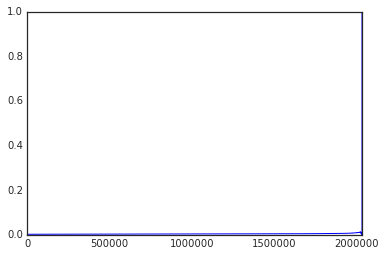

In [27]:
pd.Series(precision_both).plot()

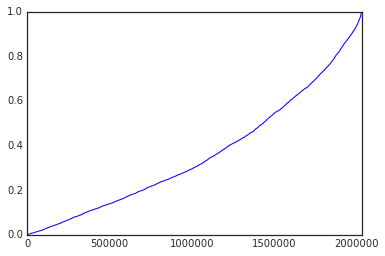

In [29]:
pd.Series(1 - recall_both).plot()

In [18]:
fpr_I, tpr_I[50:]

(array([  0.00000000e+00,   4.87855329e-07,   1.46356599e-06, ...,
          9.99994634e-01,   9.99995609e-01,   1.00000000e+00]),
 array([ 0.,  0.,  0., ...,  1.,  1.,  1.]))

In [10]:
1 - recall_I

array([  0.00000000e+00,   2.05676676e-04,   2.05676676e-04, ...,
         1.00000000e+00,   1.00000000e+00,   1.00000000e+00])

In [23]:
len(recall_I)

1454007

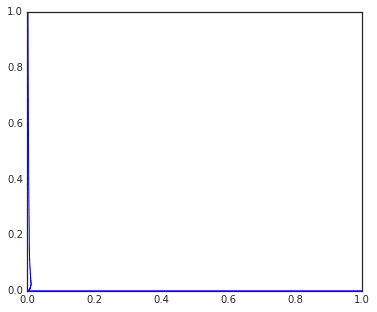

In [26]:
sns.set_style("white")
plt.figure(figsize=(6,5))
plt.plot(precision_both, recall_both, c='b', label='MHC-I')

### Run cluster jobs

In [15]:
def create_cluster_script_both_classes_int(thresholds, iterations, models):
    
    new_script_file = '/cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/prediction.both_classes_interactions.sh'
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -cwd\n")
        out_file.write("#$ -t 1-{0}\n".format(len(thresholds)))
        out_file.write("#$ -l h_vmem=10G\n")
        out_file.write("#$ -tc 50\n")
        out_file.write("#$ -l long")
        out_file.write("\n")

        out_file.write("set thresholds=({0})\n".format(" ".join(thresholds)))
        out_file.write("set iterations=({0})\n".format(" ".join(iterations)))
        out_file.write("set models=({0})\n".format(" ".join(models)))
        out_file.write("\n")

        out_file.write("set threshold=$thresholds[$SGE_TASK_ID]\n")
        out_file.write("set iteration=$iterations[$SGE_TASK_ID]\n")
        out_file.write("set model=$models[$SGE_TASK_ID]\n")
        out_file.write("\n")
        
        out_file.write("date\n")
        out_file.write("hostname\n")
        out_file.write("\n")
  
        out_file.write("Rscript --vanilla /cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/prediction.both_classes_interaction.R $threshold $iteration $model\n")
        out_file.write("\n")
                       
        out_file.write("date\n")

In [16]:
models = ['0']*6 + ['1']*6
iterations = ['10']*12
thresholds = ['50', '20', '10', '5','2', '0']*2
create_cluster_script_both_classes_int(thresholds, iterations, models)

In [2]:
def create_cluster_script_both_classes(thresholds, iterations, models):
    
    new_script_file = '/cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/prediction.both_classes.sh'
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -cwd\n")
        out_file.write("#$ -t 1-{0}\n".format(len(thresholds)))
        out_file.write("#$ -l h_vmem=40G\n")
        out_file.write("#$ -tc 50\n")
        out_file.write("#$ -l long")
        out_file.write("\n")

        out_file.write("set thresholds=({0})\n".format(" ".join(thresholds)))
        out_file.write("set iterations=({0})\n".format(" ".join(iterations)))
        out_file.write("set models=({0})\n".format(" ".join(models)))
        out_file.write("\n")

        out_file.write("set threshold=$thresholds[$SGE_TASK_ID]\n")
        out_file.write("set iteration=$iterations[$SGE_TASK_ID]\n")
        out_file.write("set model=$models[$SGE_TASK_ID]\n")
        out_file.write("\n")
        
        out_file.write("date\n")
        out_file.write("hostname\n")
        out_file.write("\n")
  
        out_file.write("Rscript --vanilla /cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/prediction.both_classes.R $threshold $iteration $model\n")
        out_file.write("\n")
                       
        out_file.write("date\n")

In [3]:
num_of_thresholds = 1
models = ['0']*num_of_thresholds + ['1']*num_of_thresholds + ['2']*num_of_thresholds + ['3']*num_of_thresholds
iterations = ['10']*2
thresholds = ['2']*2
'''
models = ['2', '3']
iterations = ['10']*2
thresholds = ['2']*2
'''
create_cluster_script_both_classes(thresholds, iterations, models)

In [4]:
def create_cluster_script_mhc_ii(thresholds, iterations, models):
    
    new_script_file = '/cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/prediction.mhc_ii.sh'
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -cwd\n")
        out_file.write("#$ -t 1-{0}\n".format(len(thresholds)))
        out_file.write("#$ -l h_vmem=40G\n")
        out_file.write("#$ -tc 50\n")
        out_file.write("#$ -l long")
        out_file.write("\n")

        out_file.write("set thresholds=({0})\n".format(" ".join(thresholds)))
        out_file.write("set iterations=({0})\n".format(" ".join(iterations)))
        out_file.write("set models=({0})\n".format(" ".join(models)))
        out_file.write("\n")

        out_file.write("set threshold=$thresholds[$SGE_TASK_ID]\n")
        out_file.write("set iteration=$iterations[$SGE_TASK_ID]\n")
        out_file.write("set model=$models[$SGE_TASK_ID]\n")
        out_file.write("\n")
        
        out_file.write("date\n")
        out_file.write("hostname\n")
        out_file.write("\n")
  
        out_file.write("Rscript --vanilla /cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/prediction.mhc_ii.R $threshold $iteration $model\n")
        out_file.write("\n")
                       
        out_file.write("date\n")

In [5]:
num_of_thresholds = 1
models = ['0']*num_of_thresholds + ['1']*num_of_thresholds + ['2']*num_of_thresholds + ['3']*num_of_thresholds
iterations = ['10']*2
thresholds = ['2']*2
'''
models = ['2', '3']
iterations = ['10']*2
thresholds = ['2']*2
'''
create_cluster_script_mhc_ii(thresholds, iterations, models)

In [6]:
def create_cluster_script_mhc_ii(thresholds, iterations, models):
    
    new_script_file = '/cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/prediction.mhc_i.sh'
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -cwd\n")
        out_file.write("#$ -t 1-{0}\n".format(len(thresholds)))
        out_file.write("#$ -l h_vmem=40G\n")
        out_file.write("#$ -tc 50\n")
        out_file.write("#$ -l long")
        out_file.write("\n")

        out_file.write("set thresholds=({0})\n".format(" ".join(thresholds)))
        out_file.write("set iterations=({0})\n".format(" ".join(iterations)))
        out_file.write("set models=({0})\n".format(" ".join(models)))
        out_file.write("\n")

        out_file.write("set threshold=$thresholds[$SGE_TASK_ID]\n")
        out_file.write("set iteration=$iterations[$SGE_TASK_ID]\n")
        out_file.write("set model=$models[$SGE_TASK_ID]\n")
        out_file.write("\n")
        
        out_file.write("date\n")
        out_file.write("hostname\n")
        out_file.write("\n")
  
        out_file.write("Rscript --vanilla /cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/prediction.mhc_i.R $threshold $iteration $model\n")
        out_file.write("\n")
                       
        out_file.write("date\n")

In [7]:
num_of_thresholds = 1
models = ['0']*num_of_thresholds + ['1']*num_of_thresholds + ['2']*num_of_thresholds + ['3']*num_of_thresholds
iterations = ['10']*2
thresholds = ['2']*2
'''
models = ['2', '3']
iterations = ['10']*2
thresholds = ['2']*2
'''
create_cluster_script_mhc_ii(thresholds, iterations, models)

In [8]:
def create_cluster_script_mutations(thresholds, iterations):
    
    new_script_file = '/cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/prediction.mutations_split.sh'
    
    with open(new_script_file, 'w') as out_file:
        out_file.write("#! /bin/csh\n")
        out_file.write("#$ -V\n")
        out_file.write("#$ -S /bin/csh\n")
        out_file.write("#$ -o /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -e /cellar/users/ramarty/Data/hla_ii/sge-system_files\n")
        out_file.write("#$ -cwd\n")
        out_file.write("#$ -t 1-{0}\n".format(len(thresholds)))
        out_file.write("#$ -l h_vmem=10G\n")
        out_file.write("#$ -tc 50\n")
        out_file.write("#$ -l long")
        out_file.write("\n")

        out_file.write("set thresholds=({0})\n".format(" ".join(thresholds)))
        out_file.write("set iterations=({0})\n".format(" ".join(iterations)))
        out_file.write("\n")

        out_file.write("set threshold=$thresholds[$SGE_TASK_ID]\n")
        out_file.write("set iteration=$iterations[$SGE_TASK_ID]\n")
        out_file.write("\n")

        out_file.write("date\n")
        out_file.write("hostname\n")
        out_file.write("\n")
  
        out_file.write("Rscript --vanilla /cellar/users/ramarty/Projects/hla_ii/data_analysis/patient_selection/prediction.mutations_split.R $threshold $iteration\n")
        out_file.write("\n")
                       
        out_file.write("date\n")

In [16]:
iterations = ['2', '10']
thresholds = ['5']*2
create_cluster_script_mutations(thresholds, iterations)